In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import joblib

# Load the dataset
df = pd.read_csv('heart.csv')  # Replace this with the correct path to your dataset

# Convert categorical features to numeric values
df['Sex'] = df['Sex'].map({'M': 1, 'F': 0})
df['ChestPainType'] = df['ChestPainType'].map({'TA': 1, 'ATA': 2, 'NAP': 3, 'ASY': 4})
df['RestingECG'] = df['RestingECG'].map({'Normal': 0, 'ST': 1, 'LVH': 2})
df['ExerciseAngina'] = df['ExerciseAngina'].map({'Y': 1, 'N': 0})
df['ST_Slope'] = df['ST_Slope'].map({'Up': 1, 'Flat': 2, 'Down': 3})

# Define feature columns
features = ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
            'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']

# Prepare feature matrix X and vector y
X = df[features]
y = df['HeartDisease']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Save the model to a file
joblib.dump(model, 'model.pkl')


c:\Users\nirmal\anaconda3\envs\myenv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


['model.pkl']

In [3]:
import os
print("Current Working Directory:", os.getcwd())


Current Working Directory: c:\Users\nirmal\Desktop\heart_disease_predictio


In [4]:
import os
if os.path.exists('model.pkl'):
    print("model.pkl exists")
else:
    print("model.pkl does not exist")


model.pkl exists


In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'Classification Report:\n{report}')


Accuracy: 0.8369565217391305
Precision: 0.8969072164948454
Recall: 0.8130841121495327
F1 Score: 0.8529411764705882
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.87      0.82        77
           1       0.90      0.81      0.85       107

    accuracy                           0.84       184
   macro avg       0.83      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



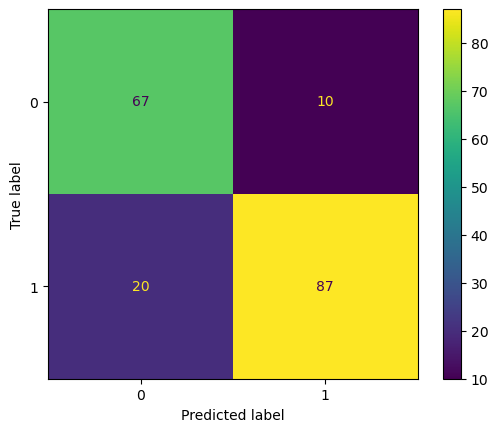

In [26]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

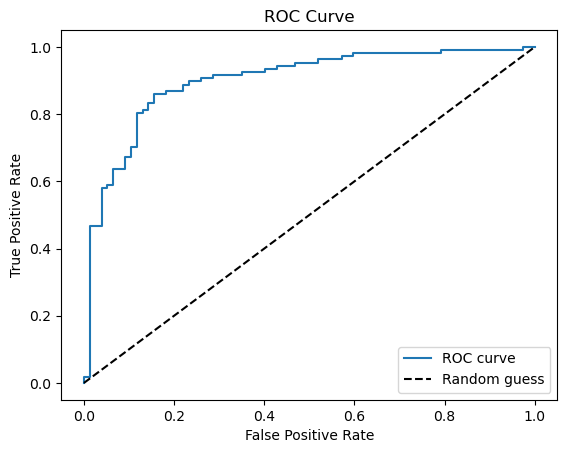

AUC Score: 0.90


In [27]:
from sklearn.metrics import roc_curve, roc_auc_score

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

# Compute the AUC score
auc_score = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print(f'AUC Score: {auc_score:.2f}')


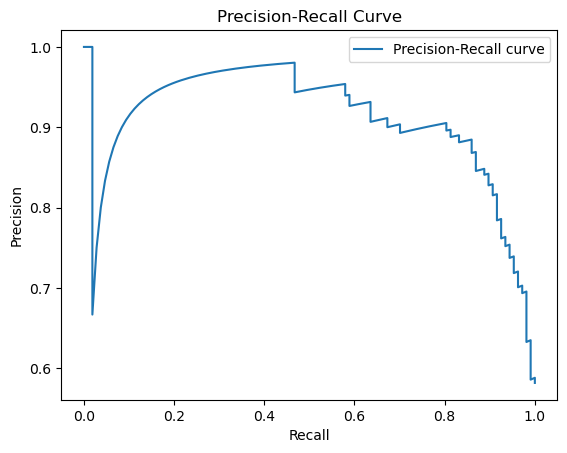

Average Precision Score: 0.91


In [28]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Compute the precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])

# Plot the precision-recall curve
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()

# Compute the average precision score
avg_precision = average_precision_score(y_test, model.predict_proba(X_test)[:, 1])
print(f'Average Precision Score: {avg_precision:.2f}')


c:\Users\nirmal\anaconda3\envs\myenv\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
1 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\nirmal\anaconda3\envs\myenv\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\nirmal\anaconda3\envs\myenv\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\nirmal\anaconda3\envs\myenv\Lib\site-packages\sklearn\linear_model\_

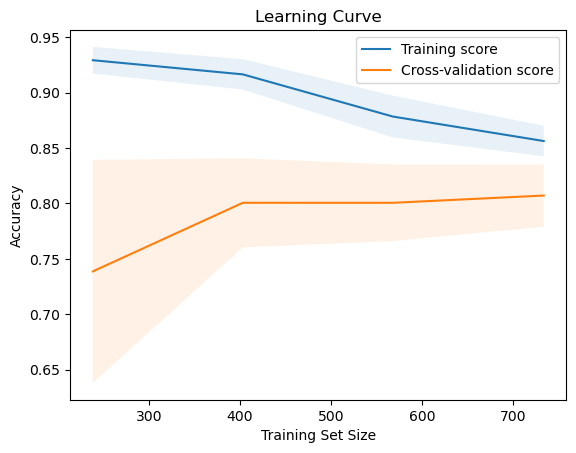

In [29]:
from sklearn.model_selection import learning_curve

# Compute the learning curve
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, scoring='accuracy', n_jobs=-1)

# Calculate the mean and standard deviation for training and testing scores
train_scores_mean = train_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)
test_scores_mean = test_scores.mean(axis=1)
test_scores_std = test_scores.std(axis=1)

# Plot the learning curve
plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, test_scores_mean, label='Cross-validation score')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1)
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1)
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.show()


In [3]:
print(y_train.value_counts())


HeartDisease
1    401
0    333
Name: count, dtype: int64
